1- import libraries

In [103]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import itertools




2-Load test data

In [ ]:
test_ds = test_ds
class_names = class_names
num_classes = len(class_names)

print("Classes:", class_names)
print("Number of classes:", num_classes)


Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Number of classes: 9


3-Load EfficientNetB3 Model

In [105]:
efficientnet_model = keras.models.load_model(
    "Models/EfficientNetB3/efficientnetb3_model.keras"
)

print("EfficientNetB3 loaded successfully!")


EfficientNetB3 loaded successfully!


4-Load ResNet50 Model

In [106]:
efficientnet_model = keras.models.load_model(
    "Models/EfficientNetB3/efficientnetb3_model.keras"
)
print("ResNet50 loaded successfully!")


ResNet50 loaded successfully!


5-Load MobileNet Model

In [107]:
mobilenet_model = keras.models.load_model(
    "Models/MobileNet/mobilenet_model.keras"
)

print("MobileNet loaded successfully!")

MobileNet loaded successfully!


6-Evaluation Helper Function


In [109]:
def evaluate_model(model, test_ds):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        preds = model.predict(images, verbose=0)
        preds = np.argmax(preds, axis=1)
        y_pred.extend(preds)
        y_true.extend(labels.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return acc, prec, rec, f1, y_true, y_pred




7-Evaluate the 3 Models

In [110]:
acc_eff, prec_eff, rec_eff, f1_eff, y_true_eff, y_pred_eff = evaluate_model(efficientnet_model, test_ds)
acc_res, prec_res, rec_res, f1_res, y_true_res, y_pred_res = evaluate_model(resnet_model, test_ds)
acc_mob, prec_mob, rec_mob, f1_mob, y_true_mob, y_pred_mob = evaluate_model(mobilenet_model, test_ds)


d:\project Ai\plant-disease-classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


8-Comparison DataFrame

In [112]:
comparison = pd.DataFrame({
    "Model": ["EfficientNetB3", "ResNet50", "MobileNet"],
    "Accuracy": [acc_eff, acc_res, acc_mob],
    "Precision": [prec_eff, prec_res, prec_mob],
    "Recall": [rec_eff, rec_res, rec_mob],
    "F1-score": [f1_eff, f1_res, f1_mob]
})

comparison

,Model,Accuracy,Precision,Recall,F1-score
0,EfficientNetB3,0.878049,0.900071,0.865741,0.852623
1,ResNet50,0.695122,0.807359,0.711700,0.697907
2,MobileNet,0.731707,0.707211,0.732435,0.684139


9-Extract Best Metrics

In [114]:

best_accuracy_model = comparison.loc[comparison["Accuracy"].idxmax(), "Model"]
best_precision_model = comparison.loc[comparison["Precision"].idxmax(), "Model"]
best_recall_model = comparison.loc[comparison["Recall"].idxmax(), "Model"]
best_f1_model = comparison.loc[comparison["F1-score"].idxmax(), "Model"]

comparison

print("Best results among the three models:\n")

print(f"Highest Accuracy:     {best_accuracy_model}")
print(f"Highest Precision:    {best_precision_model}")
print(f"Highest Recall:       {best_recall_model}")
print(f"Highest F1-score:     {best_f1_model}")

Best results among the three models:

Highest Accuracy:     EfficientNetB3
Highest Precision:    EfficientNetB3
Highest Recall:       EfficientNetB3
Highest F1-score:     EfficientNetB3


10-Heatmap for the Comparison Table

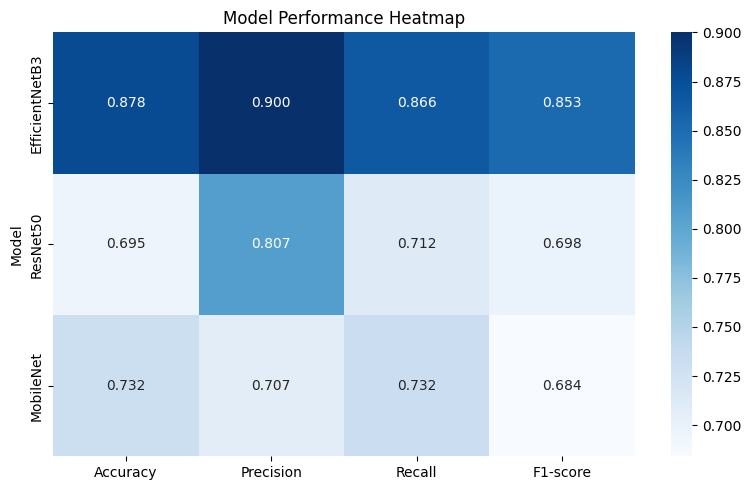

In [115]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(
    comparison.set_index("Model"),
    annot=True,
    cmap="Blues",
    fmt=".3f"
)
plt.title("Model Performance Heatmap")
plt.tight_layout()
plt.show()

11-Confusion Matrix Function

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    """
    Plots a confusion matrix with seaborn heatmap for better visualization.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - class_names: list of class names
    - title: plot title
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot using seaborn heatmap
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

12-Plot Confusion Matrices

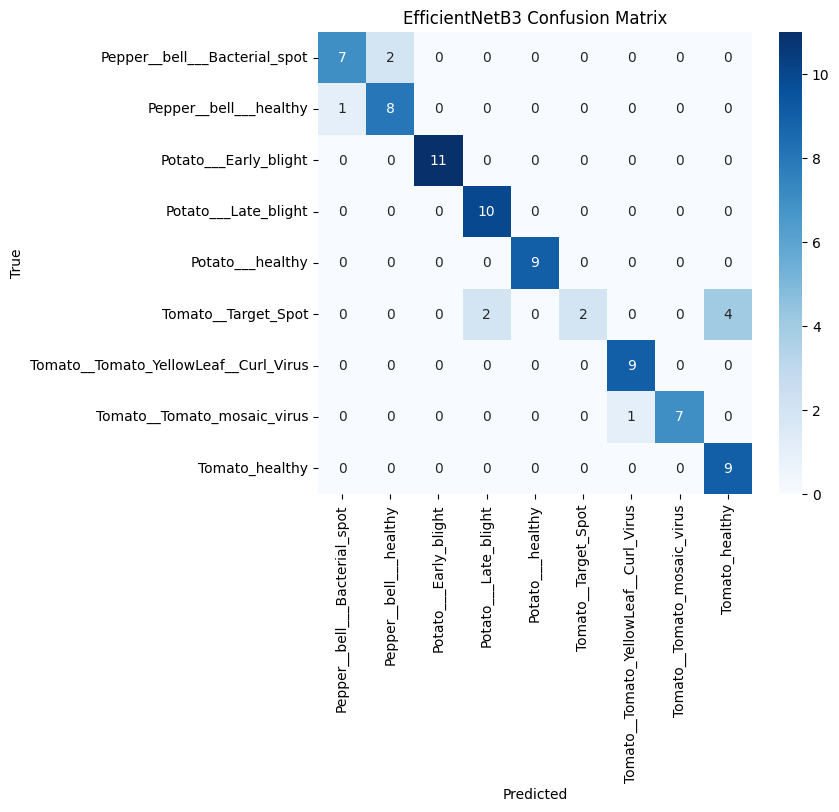

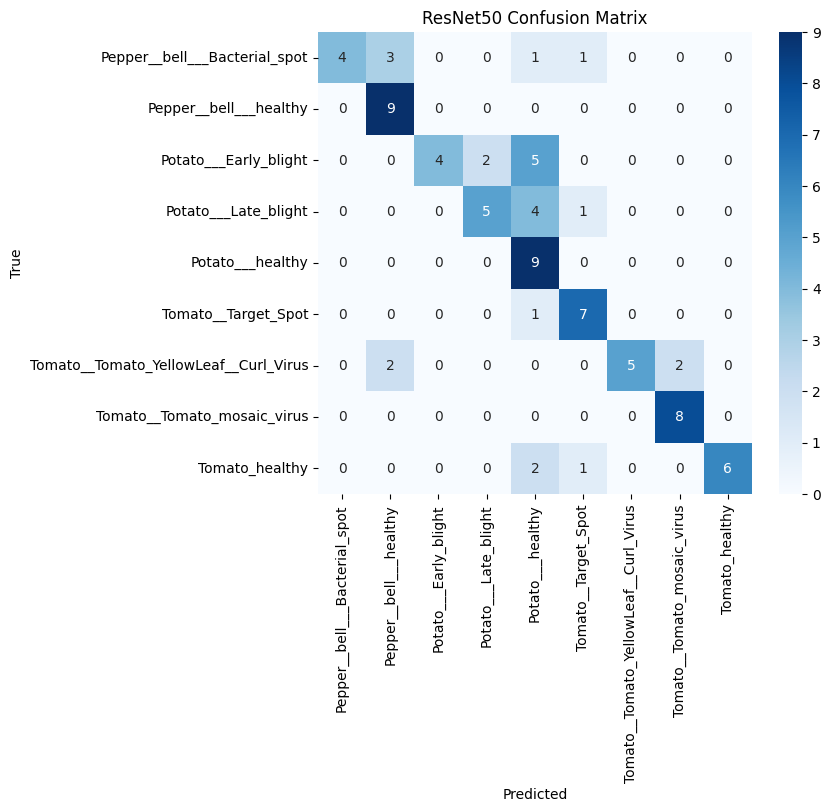

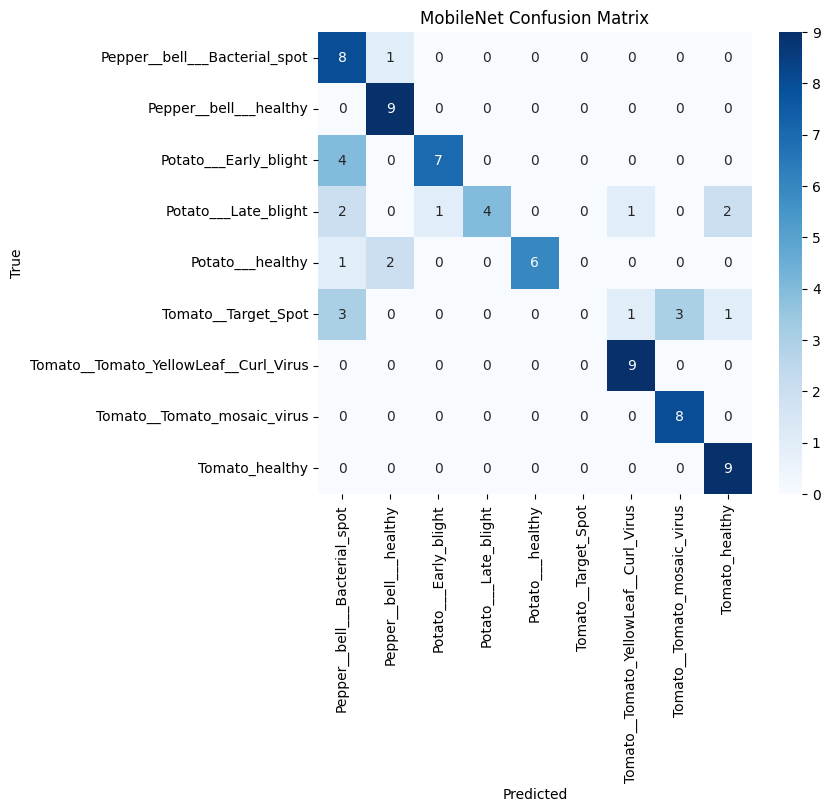

In [117]:
# For EfficientNetB3
plot_confusion_matrix(y_true_eff, y_pred_eff, class_names, title="EfficientNetB3 Confusion Matrix")

# For ResNet50
plot_confusion_matrix(y_true_res, y_pred_res, class_names, title="ResNet50 Confusion Matrix")

# For MobileNet
plot_confusion_matrix(y_true_mob, y_pred_mob, class_names, title="MobileNet Confusion Matrix")